In [ ]:
%autosave 0

Autosave disabled


## Previous steps

### Installing and importing libraries

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4e4c4b1463e82ee14e74930be1ed3ec467ac9c7d057026d6bb2062941fd375da
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import wget
from zipfile import ZipFile

## Preparing the images dataset

### Downloading the dataset

In [ ]:
!wget -N https://github.com/carrionalfredo/Capstone_1/raw/main/dataset/Pistachio_image_Dataset.zip

--2022-12-18 21:54:25--  https://github.com/carrionalfredo/Capstone_1/raw/main/dataset/Pistachio_image_Dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/carrionalfredo/Capstone_1/main/dataset/Pistachio_image_Dataset.zip [following]
--2022-12-18 21:54:25--  https://raw.githubusercontent.com/carrionalfredo/Capstone_1/main/dataset/Pistachio_image_Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25689033 (24M) [application/zip]
Saving to: ‘Pistachio_image_Dataset.zip’

Pistachio_image_Dat 100%[===================>]  24.50M   110MB/s    in 0.2s    

Last-modified header missing -

In [ ]:
ZipFile('Pistachio_image_Dataset.zip', 'r').extractall(path='./images')

### Load and create train and evaluation images sets

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  './images/',
  validation_split=0.2,
  seed = 1,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  './images/',
  validation_split=0.2,
  seed = 1,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2148 files belonging to 2 classes.
Using 429 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Kirmizi_Pistachio', 'Siirt_Pistachio']


## Building the model

In [ ]:
# import required packages from Keras
from keras.models import Sequential
from keras.layers import Rescaling, Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Activation

### Functions for building model and training the model

In [ ]:
def model_build(name, droprate, learning_rate):
    model = Sequential(name = name)
    
    model.add(Rescaling(1./255))
    
    model.add(Conv2D(32,3,3, input_shape = (150,150,3), activation = 'relu'))
    
    model.add(MaxPool2D(2,2))
    
    model.add(Dropout(droprate, seed= 1))
    
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    
    model.add(Dense(2, activation='softmax', name = 'output'))
    
    model.compile(
      optimizer = keras.optimizers.Adam(
          learning_rate = learning_rate
          ),
      loss=keras.losses.SparseCategoricalCrossentropy(),
          metrics=['accuracy']
          )
    return model

In [ ]:
def train_model(name, droprate, learning_rate, batch_size, epochs):
  model = model_build(name, droprate, learning_rate)
  history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      batch_size=batch_size,
      )
  return model, history.history

Inicial values for hyperparameters

In [ ]:
droprate = 0.5
learning_rate=0.001
epochs = 100

## Training and tuning the model

### Base model

In [ ]:
results_bm = train_model(name= 'Base_model', droprate=droprate, learning_rate=learning_rate, batch_size=batch_size, epochs=epochs)

Epoch 1/100
54/54 [==============================] - 14s 102ms/step - loss: 0.5166 - accuracy: 0.7382 - val_loss: 0.3951 - val_accuracy: 0.8252
Epoch 2/100
54/54 [==============================] - 6s 107ms/step - loss: 0.3847 - accuracy: 0.8168 - val_loss: 0.3655 - val_accuracy: 0.8462
Epoch 3/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3687 - accuracy: 0.8226 - val_loss: 0.3457 - val_accuracy: 0.8462
Epoch 4/100
54/54 [==============================] - 3s 49ms/step - loss: 0.3439 - accuracy: 0.8487 - val_loss: 0.3336 - val_accuracy: 0.8671
Epoch 5/100
54/54 [==============================] - 3s 48ms/step - loss: 0.3413 - accuracy: 0.8458 - val_loss: 0.3262 - val_accuracy: 0.8765
Epoch 6/100
54/54 [==============================] - 3s 48ms/step - loss: 0.3119 - accuracy: 0.8604 - val_loss: 0.3847 - val_accuracy: 0.8228
Epoch 7/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3184 - accuracy: 0.8528 - val_loss: 0.3119 - val_accuracy: 0.8718
Epo

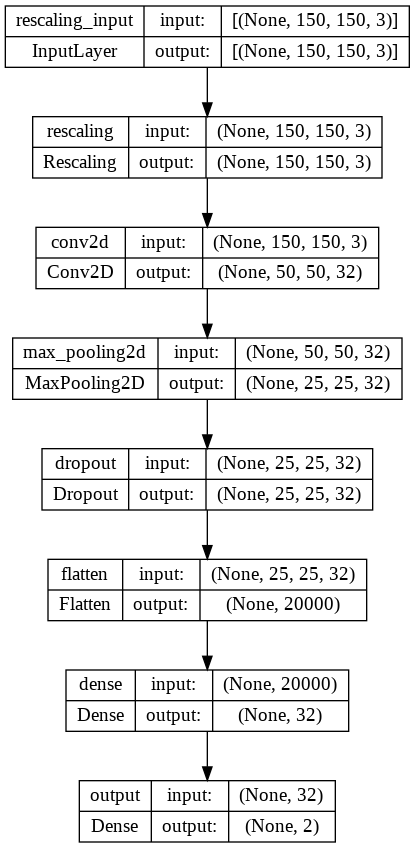

In [ ]:
keras.utils.plot_model(
    results_bm[0],
    to_file="base_model.png",
    show_shapes=True
    )

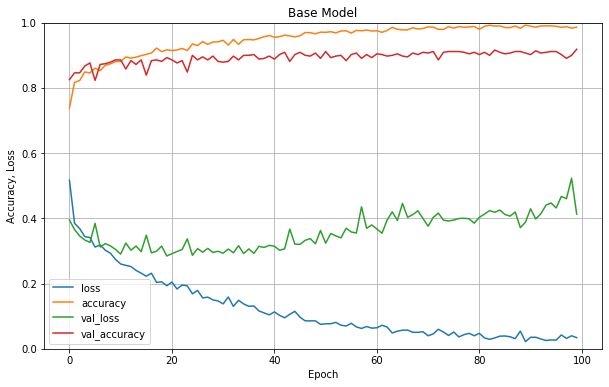

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training & validation accuracy and loss values
pd.DataFrame(results_bm[1]).plot(figsize=(10, 6))
plt.title('Base Model')
plt.ylabel('Accuracy, Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Tuning the learning rate for the Adam optimizer

In [ ]:
opt_scores = {}
l_rate = {}
for lr in [0.0001, 0.001, 0.01]:
  print(lr)
  model = train_model(name= 'LR_tuning' , droprate=droprate, learning_rate=lr, batch_size=batch_size, epochs=epochs)
  opt_scores[lr] = model[1]

0.0001
Epoch 1/100
54/54 [==============================] - 3s 50ms/step - loss: 0.5572 - accuracy: 0.7126 - val_loss: 0.4389 - val_accuracy: 0.7902
Epoch 2/100
54/54 [==============================] - 3s 47ms/step - loss: 0.4108 - accuracy: 0.8057 - val_loss: 0.3939 - val_accuracy: 0.8182
Epoch 3/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3916 - accuracy: 0.8092 - val_loss: 0.3600 - val_accuracy: 0.8392
Epoch 4/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3941 - accuracy: 0.8197 - val_loss: 0.3503 - val_accuracy: 0.8485
Epoch 5/100
54/54 [==============================] - 3s 48ms/step - loss: 0.3755 - accuracy: 0.8272 - val_loss: 0.3519 - val_accuracy: 0.8415
Epoch 6/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3423 - accuracy: 0.8464 - val_loss: 0.3427 - val_accuracy: 0.8578
Epoch 7/100
54/54 [==============================] - 3s 47ms/step - loss: 0.3437 - accuracy: 0.8447 - val_loss: 0.3209 - val_accuracy: 0.8648

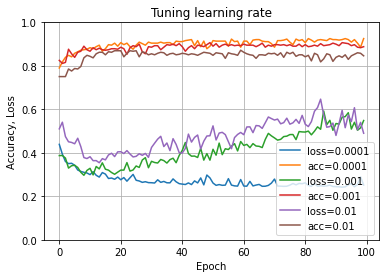

In [ ]:
for lr, hist in opt_scores.items():
    plt.plot(hist['val_loss'], label=('loss=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('acc=%s' % lr))
    
plt.title('Tuning learning rate')
plt.ylabel('Accuracy, Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()

The best validation accuracy and losss is got with a learning rate of 0.0001

In [ ]:
learning_rate = 0.0001

In [ ]:
epochs = 60

### Tuning the drop rate for Dropout layer

In [ ]:
dr_scores = {}
d_rate = {}
for dr in [0.2, 0.4, 0.6, 0.8]:
  print(dr)
  model = train_model(name= 'DR_tuning' , droprate=dr, learning_rate=learning_rate, batch_size=batch_size, epochs=epochs)
  dr_scores[dr] = model[1]

0.2
Epoch 1/60
54/54 [==============================] - 3s 51ms/step - loss: 0.5340 - accuracy: 0.7353 - val_loss: 0.4457 - val_accuracy: 0.7925
Epoch 2/60
54/54 [==============================] - 3s 47ms/step - loss: 0.4250 - accuracy: 0.8010 - val_loss: 0.3874 - val_accuracy: 0.8252
Epoch 3/60
54/54 [==============================] - 3s 48ms/step - loss: 0.3934 - accuracy: 0.8168 - val_loss: 0.3780 - val_accuracy: 0.8298
Epoch 4/60
54/54 [==============================] - 3s 47ms/step - loss: 0.3661 - accuracy: 0.8307 - val_loss: 0.3558 - val_accuracy: 0.8438
Epoch 5/60
54/54 [==============================] - 3s 48ms/step - loss: 0.3515 - accuracy: 0.8354 - val_loss: 0.3442 - val_accuracy: 0.8601
Epoch 6/60
54/54 [==============================] - 3s 49ms/step - loss: 0.3419 - accuracy: 0.8406 - val_loss: 0.3324 - val_accuracy: 0.8625
Epoch 7/60
54/54 [==============================] - 3s 47ms/step - loss: 0.3304 - accuracy: 0.8458 - val_loss: 0.3229 - val_accuracy: 0.8718
Epoch 8/6

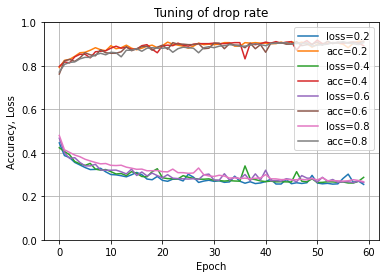

In [ ]:
for dr, hist in dr_scores.items():
    plt.plot(hist['val_loss'], label=('loss=%s' % dr))
    plt.plot(hist['val_accuracy'], label=('acc=%s' % dr))
    
plt.title('Tuning of drop rate')
plt.ylabel('Accuracy, Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()

The best accuracy and loss for validation is got with drop rate of 0.2

In [ ]:
droprate = 0.6

## Final model

In [ ]:
final_model = model_build(name='Final_Model', droprate=droprate, learning_rate=learning_rate)

In [ ]:
droprate, learning_rate

(0.6, 0.0001)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'CS1{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
history = final_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint]
    )

Epoch 1/60
54/54 [==============================] - 3s 51ms/step - loss: 0.5790 - accuracy: 0.7062 - val_loss: 0.4335 - val_accuracy: 0.8065
Epoch 2/60
54/54 [==============================] - 3s 48ms/step - loss: 0.4486 - accuracy: 0.7894 - val_loss: 0.3938 - val_accuracy: 0.8205
Epoch 3/60
54/54 [==============================] - 3s 48ms/step - loss: 0.4107 - accuracy: 0.8045 - val_loss: 0.3714 - val_accuracy: 0.8368
Epoch 4/60
54/54 [==============================] - 3s 48ms/step - loss: 0.3854 - accuracy: 0.8214 - val_loss: 0.3593 - val_accuracy: 0.8415
Epoch 5/60
54/54 [==============================] - 3s 49ms/step - loss: 0.3748 - accuracy: 0.8220 - val_loss: 0.3503 - val_accuracy: 0.8462
Epoch 6/60
54/54 [==============================] - 3s 48ms/step - loss: 0.3710 - accuracy: 0.8418 - val_loss: 0.3707 - val_accuracy: 0.8205
Epoch 7/60
54/54 [==============================] - 3s 50ms/step - loss: 0.3582 - accuracy: 0.8319 - val_loss: 0.3373 - val_accuracy: 0.8648
Epoch 8/60
54

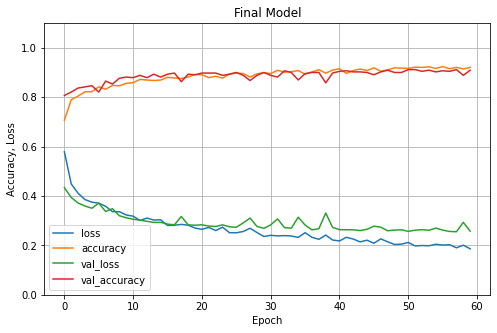

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training & validation accuracy and loss values
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.title('Final Model')
plt.ylabel('Accuracy, Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
final_model.summary()

Model: "Final_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 20000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                640032    
                                                       

In [ ]:
final_model.save_weights('CS1_model.h5', save_format='h5')